# Finans Projekt 1 - English
This notebook is for assistance with the coding for many of the questions in the project.
The sections are marked with the corresponding question in the Project description.
Remember, this code is provided to get started with the project, but the code is not complete for answering the corresponding questions

#### Initialize python packages

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### Read Data

In [3]:
# path to project data (replace with your own path)
file_path = '/Users/Gemuese/Benjamin/DTU/Statistics/finans1/finans1_data.csv'

## Read data into a pandas DataFrame
D = pd.read_csv(file_path, delimiter=";")
## Keep only the dates and the ETFs AGG, VAW, IWN, and SPY
D = D.loc[:, ["t", "AGG", "VAW", "IWN", "SPY"]]

#### a) Simple summary of data

In [4]:
print(f"Dimension of DataFrame: {D.shape}") # f-strings allow us to insert variables directly into the string
print(f"Variable names: {D.columns}")
print("\nFirst few rows of DataFrame:") # \n is the newline character for strings
display(D.head())
print("Last row of DataFrame:")
display(D.tail())
print("Some summary statistics:")
display(D.describe())
print("Data types:", D.dtypes)

Dimension of DataFrame: (454, 5)
Variable names: Index(['t', 'AGG', 'VAW', 'IWN', 'SPY'], dtype='object')

First few rows of DataFrame:


,t,AGG,VAW,IWN,SPY
0,2006-5-5,-0.006088,0.031573,0.023603,0.007987
1,2006-5-12,-0.003675,-0.027460,-0.048072,-0.024751
2,2006-5-19,0.006661,-0.050000,-0.014096,-0.016558
3,2006-5-26,0.001832,0.012539,0.009717,0.010071
4,2006-6-5,-0.004775,-0.022321,-0.017734,-0.009815


Last row of DataFrame:


,t,AGG,VAW,IWN,SPY
449,2015-4-10,-0.001615,0.016019,0.000193,0.017438
450,2015-4-17,0.003775,-0.003171,-0.010406,-0.009950
451,2015-4-24,-0.001522,0.011181,0.010418,0.017793
452,2015-5-1,-0.010404,0.014923,-0.023800,-0.004394
453,2015-5-8,-0.000453,0.004074,0.002566,0.004271


Some summary statistics:


,AGG,VAW,IWN,SPY
count,454.000000,454.000000,454.000000,454.000000
mean,0.000266,0.001794,0.001188,0.001360
std,0.005976,0.036083,0.032015,0.024786
min,-0.029604,-0.203660,-0.179655,-0.137598
25%,-0.002973,-0.016096,-0.014305,-0.011325
50%,0.000237,0.004798,0.003120,0.004216
75%,0.003893,0.019685,0.019056,0.014498
max,0.030507,0.142977,0.126702,0.083276


Data types: t       object
AGG    float64
VAW    float64
IWN    float64
SPY    float64
dtype: object


A) Write a short description of the data. Which variables are included in the dataset? Are the variables quantitative and/or categorized (or date variables)? (Categorized variables are introduced in Chapter 8, but they are simply variables which divide the observations into categories/groups - e.g. three categories: low, medium, and high). How many observations are there? Which time period is covered by the observations (date of first and last observations)? Are there any missing values?

- The variables in the data are time dependent and catgorized; growth or loss, the growths/loss is given in as percentage/fraction
- There are 454 observed weeks, or 113.5 months corresponding to 8.1 years in the given sample
- The start date for the ovserved periode is 05/05/2006 and it ends in 8/5/2015
- The data apears to be complete form what I can see...


In [5]:
print(D.isnull())

         t    AGG    VAW    IWN    SPY
0    False  False  False  False  False
1    False  False  False  False  False
2    False  False  False  False  False
3    False  False  False  False  False
4    False  False  False  False  False
..     ...    ...    ...    ...    ...
449  False  False  False  False  False
450  False  False  False  False  False
451  False  False  False  False  False
452  False  False  False  False  False
453  False  False  False  False  False

[454 rows x 5 columns]


#### b) Histogram (empirical density)

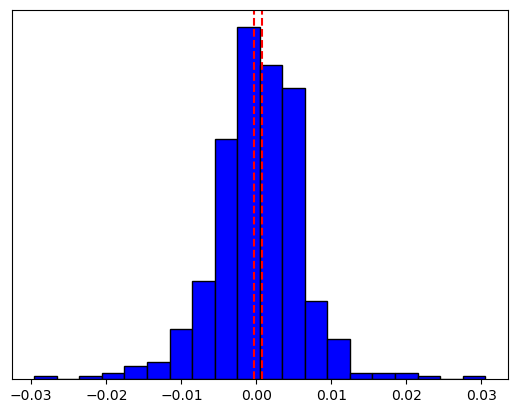

In [6]:
## Histogram describing the empirical density of the weekly returns from
## AGG (histogram of weekly returns normalized to have an area of 1)
plt.hist(D['AGG'].dropna(), bins=20, density=True, color='blue', edgecolor='black') # dropna() removes potential missing values
## Lets see the confidence intervall
n = len(D)
data = D['AGG']
##
plt.axvline(stats.t.ppf(0.025, df=n-1)*data.std(ddof=1)/np.sqrt(n)+data.mean(), linestyle='--', color="red", ymin=0, ymax=1)
plt.axvline(stats.t.ppf(0.975, df=n-1)*data.std(ddof=1)/np.sqrt(n)+data.mean(), linestyle='--', color="red", ymin=0, ymax=1)
plt.tick_params(left = False, right = False , labelleft = False) 
##
plt.show()

b) Make a density histogram of the weekly returns from the ETF AGG. Use this histogram to describe the empirical distribution of the returns. Is the empirical density symmetrical or skewed? Can the returns be both positive and negative? Is there much variation to be seen in the observations?

- Firstly the distribution looks like a random sample pulled from a normal distribution, though a QQ-plot will be made later to confirm this.
- It is however ever so slightly skewed, hint of a hint as most data is expected to be; where the median is slightly lower then the mean; 0.000237 < 0.000266. But yeah, for the most part they're pretty damn close.
- As said earlier the returns can be both positive (growth), or negative (loss)
- The maximum expected growth/loss per week is normally between 0 and 3 percent (either way). The sample standard deviation form the sample mean, 0.0266 %, is 0.6 %, so 95% of weeks bring in a growth/loss between [ - 1.2, 1.2 ] % 

#### Date variable t

In [9]:
# Converts the variable 't' to a date variable
D['t'] = pd.to_datetime(D['t']) 
# to_datetime() method converts string to a datetime pandas object. 
# This is necesary to make it ordinal
display(D['t'].describe())

count                              454
mean     2010-11-05 08:37:00.264317184
min                2006-05-05 00:00:00
25%                2008-08-05 18:00:00
50%                2010-11-04 12:00:00
75%                2013-02-06 06:00:00
max                2015-05-08 00:00:00
Name: t, dtype: object

#### c) Plots of data over time 

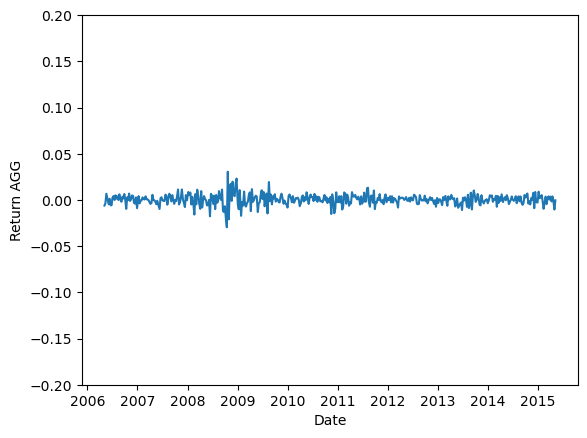

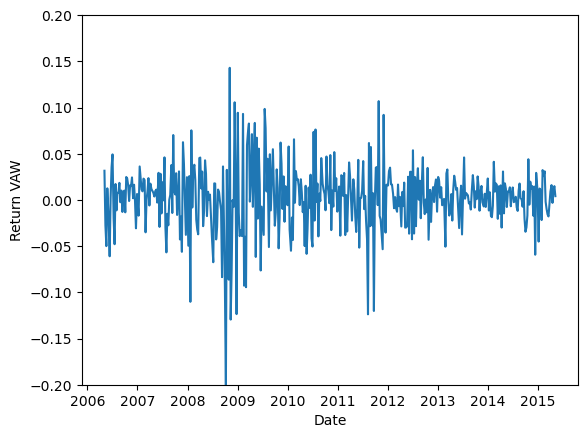

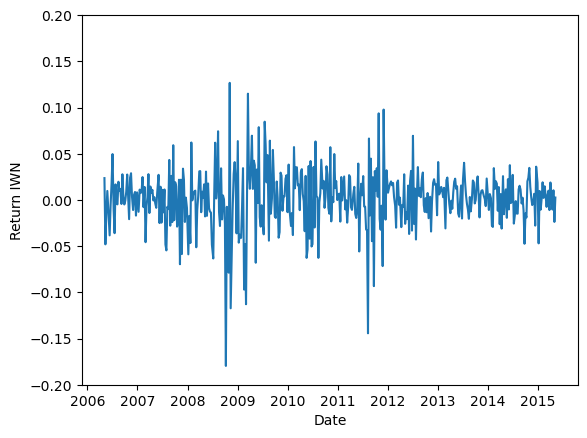

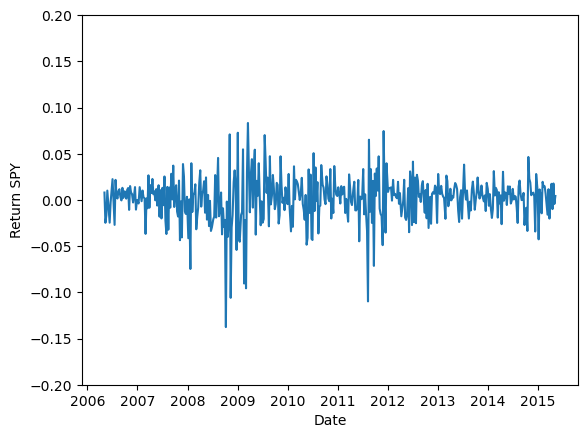

In [10]:
## Plot of weekly return over time for AGG
ylim = (-0.2, 0.2)
plt.plot(D['t'], D['AGG'], label='AGG')
plt.ylim(ylim)
plt.xlabel("Date")
plt.ylabel("Return AGG")
plt.show()
## Similar plots for the three other ETFs
for etf in ['VAW', 'IWN', 'SPY']:
    plt.plot(D['t'], D[etf], label=etf)
    plt.ylim(ylim)
    plt.xlabel("Date")
    plt.ylabel(f"Return {etf}")
    plt.show()

c) Make plots illustrating the weekly return over time for each of the four ETFs. Use these plots to describe the development of the weekly returns in words. Does the level of return seem to change over time? Are there specific periods of time dur- ing which the weekly returns are notably different? Are there overall differences in the returns from the different ETFs?

- To answer this I'd like to make linear fits for each plot and we can look at the incline.



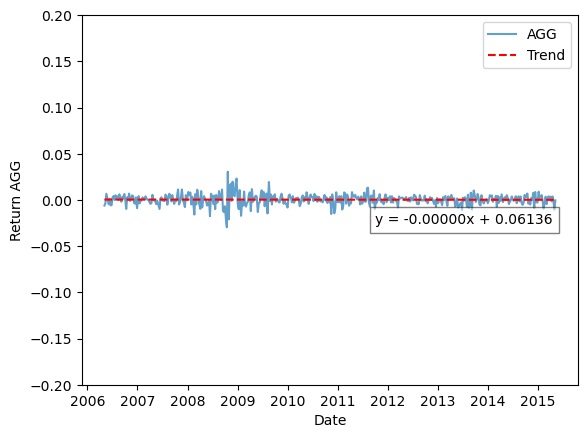

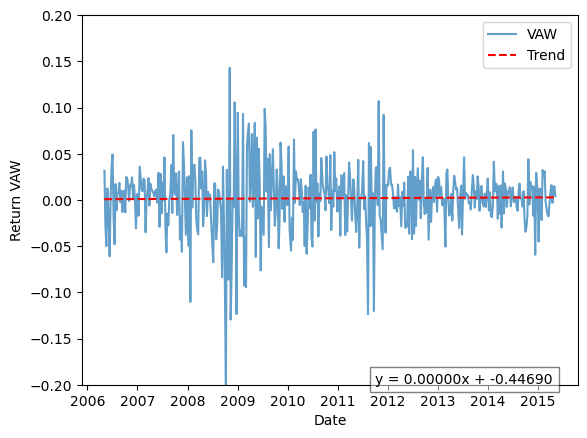

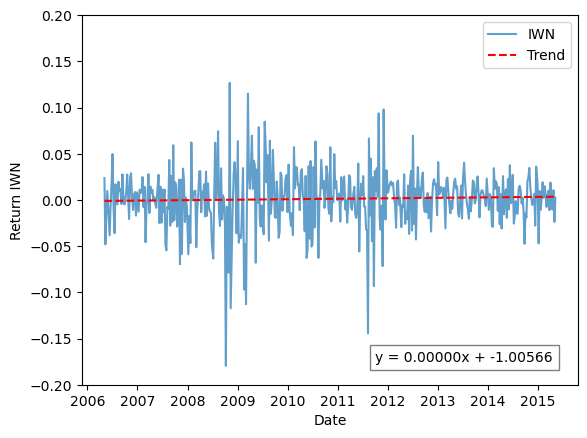

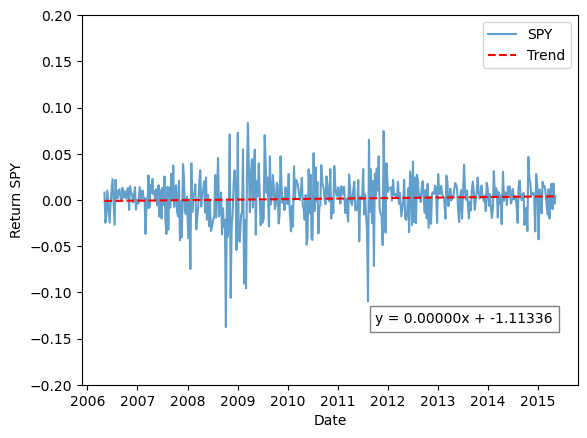

In [23]:

ylim = (-0.2, 0.2)

# Convert dates to numerical values
D['t_num'] = D['t'].map(pd.Timestamp.toordinal)

# Loop for the other ETFs
for etf in ['AGG', 'VAW', 'IWN', 'SPY']:
    plt.figure()
    plt.plot(D['t'], D[etf], label=etf, alpha=0.7)

    # Linear regression for each ETF
    coeffs = np.polyfit(D['t_num'], D[etf], 1)
    trendline = np.polyval(coeffs, D['t_num'])
    plt.plot(D['t'], trendline, linestyle="--", color="red", label="Trend")

    # Get axis limits to position text in bottom-right
    x_min, x_max = plt.gca().get_xlim()
    y_min, y_max = plt.gca().get_ylim()

    # Define position slightly above the bottom-right corner
    text_x = x_max - (x_max - x_min) * 0.05  # 5% from the right edge
    text_y = y_min + (y_max - y_min) * 0.05  # 5% above the bottom

    # Extract slope and intercept
    slope, intercept = coeffs
    eq_text = f"y = {slope:.5f}x + {intercept:.5f}"

    # Add text box with coefficients
    plt.text(text_x, text_y, eq_text,
             fontsize=10, color="black", verticalalignment="bottom",
             horizontalalignment="right",
             bbox=dict(facecolor="white", alpha=0.5, edgecolor="black"))
    

    plt.ylim(ylim)
    plt.xlabel("Date")
    plt.ylabel(f"Return {etf}")
    plt.legend()
    plt.show()


- As we can see by adding the linear fits to the weekly returns over time, is that there is no linear trend up or down. However this only means that there is not more not more growth or loss over time, and this is not a definite mesure to termine whether money has been made. Reading data is really not that intuitive damn.

#### d) Box plots by ETF

/var/folders/j3/dq4h2kzj2fz8d1gs60fb29m80000gr/T/ipykernel_35212/2454347449.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([D['AGG'],D['VAW'],D['IWN'],D['SPY']], labels=etfs)


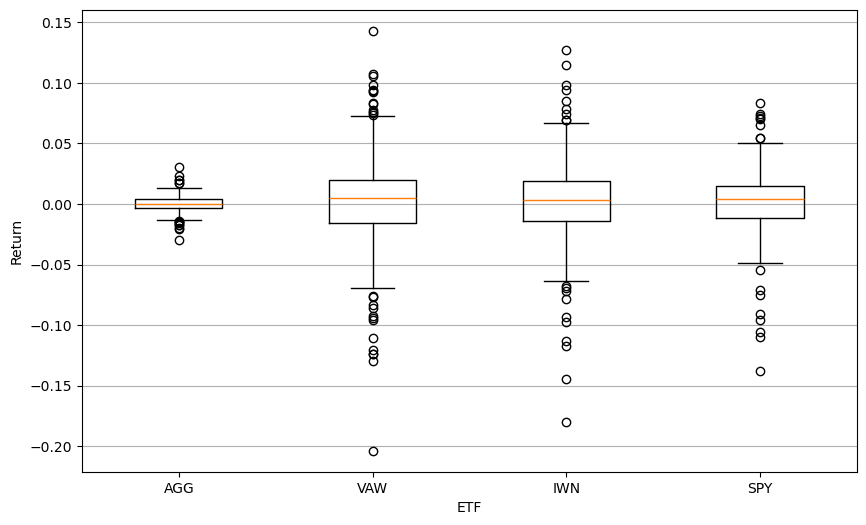

In [24]:
etfs = ['AGG', 'VAW', 'IWN', 'SPY']

plt.figure(figsize=(10, 6))
plt.boxplot([D['AGG'],D['VAW'],D['IWN'],D['SPY']], labels=etfs)
plt.xlabel("ETF")
plt.ylabel("Return")
plt.grid(axis='y')
plt.show()

d) Make a box plot of the weekly returns by ETF. Use this plot to describe the empirical distribution of the weekly returns from each of the four ETFs. Are the distributions symmetrical or skewed? Does there seem to be a difference between the distributions (if so, describe the difference)? Are there extreme obser- vations/outliers?

- AGG has the most "stable" return pattern with the least variation, both towards growth or loss, really a stable fella.
- VAW has a much larger intervall between the upper and the lower quartile, meaning that the returns will vary much more from week to week. THe maximum and the minimum for the data is also the largest, undermining the to variation in weekly returns. The median is also the highest over 0 form all of the plots.
- IWN has is in the middel between VAW and SPY and has the lowest weekly-return.outlier, pointing to a week spot in stok distribution whereas there possibly existst one factor that will impact the majority of the stock negatively.
-SPY demonstrates a more stalbe weekly retrun in comparison to the more "active" three stocks, however it is still turbulent in comparison with AGG. 

#### e) Key summary statistics for AGG

In [25]:
print(f"Total number of observations (without missing values): {D['AGG'].notna().sum()}")
print(f"Sample mean of weekly returns: {np.mean(D['AGG'])}")
print(f"Sample variance of weekly returns: {np.var(D['AGG'], ddof=1)}") # ddof=1 as we want the *sample* variance

Total number of observations (without missing values): 454
Sample mean of weekly returns: 0.00026575697622256976
Sample variance of weekly returns: 3.57106780351428e-05



e) Fill in the empty cells in the table above by computing the relevant summary statistics for each of the four ETFs. Which additional information may be gained from the table, compared to the box plot?

- all of the information is present in the D.describe function.

#### f) QQ-plot for model validation

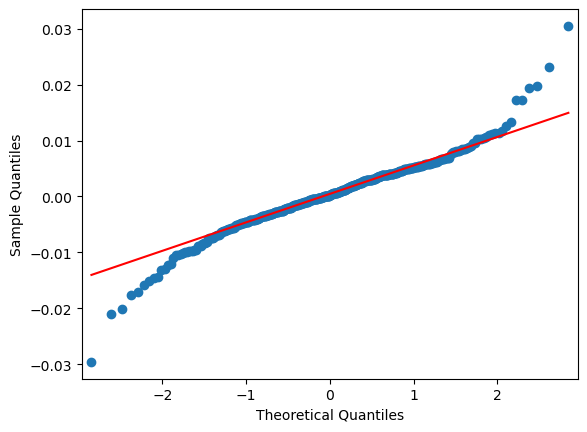

In [26]:
# QQ-plot for AGG's weekly returns
sm.qqplot(D['AGG'].dropna(), line ='q')
plt.show()

f) Specify separate statistical models describing the weekly return for each of the four ETFs (see Remark 3.2). Estimate the parameters of the models (mean and standard deviation). Perform model validation (see Chapter 3 and Section 3.1.8). Since, in this case, confidence intervals and hypothesis tests involve the distribution of an average, it might also be useful to include the central limit theorem (Theorem 3.14) in the discussion.

Among other models; X[i] ~ N(mu,sigma ** 2), where the samples are indepentenly and identically distributed, which only would be the case if the distribution of stocks really is proofed to not depend on similar factors.



#### g-h) One-sample t-test

In [ ]:
# Test hypothesis mu = 0 for AGG's weekly returns
res = stats.ttest_1samp(D['AGG'], popmean=0)
print(f"Test statistic: {res.statistic}")
print(f"P-value: {res.pvalue}")

# Confidence interval
print(res.confidence_interval())


#### i) Welch t-test

In [ ]:
# Comaring the mean weekly returns of VAW and AGG
res = stats.ttest_ind(D['VAW'].dropna(), D['AGG'].dropna(), equal_var=False)
print(f"Test statistic: {res.statistic}")
print(f"P-value: {res.pvalue}")

#### k) Correlation

In [ ]:
# Computing the  correlation between selected ETFs
correlation_matrix = D[["AGG", "VAW", "IWN", "SPY"]].corr()
display(correlation_matrix)

## EXTRA
#### Subsets in Python

In [ ]:
## df['AGG'] < 0 returns all observations where AGG is negative
## Can be used to extract all AGG losses
loss_weeks = D['AGG'] < 0
agg_losses = D['AGG'][loss_weeks]
print("Weeks with negative returns in AGG:")
display(agg_losses)

## Alternatively, use the 'query' method
agg_losses_query = D.query('AGG < 0')
print("Weeks with negative returns in AGG (query method):")
display(agg_losses_query)
# Or use the 'loc' method
agg_losses_loc = D.loc[D['AGG'] < 0, 'AGG']
print("Weeks with negative returns in AGG (loc method):")
display(agg_losses_loc)

## More complex logical expressions can be made, e.g.:
## Find all observations from weeks where AGG had a loss and SPY had a gain
agg_loss_spy_gain = D.query('AGG < 0 & SPY > 0')
print("Weeks with negative AGG returns and positive SPY returns:")
display(agg_loss_spy_gain)

# "display()" function gives a nicer table than print. It is 
# especially useful when working with dataframes (pandas)

#### Additional Python tips

In [ ]:
## Make a for loop to calculate some summary 
## statistics and save the result in a new data frame
Tbl = pd.DataFrame()
for i in ['AGG', 'VAW', 'IWN', 'SPY']:
    Tbl.loc[i, "ETF_mean"] = D[i].mean()
    Tbl.loc[i, "ETF_var"] = D[i].var(ddof=1) 
    
# show
display(Tbl)

In [ ]:
# There are many other ways to do these calculations, some more concise. For example
# Calculate mean and variance for all columns but 't'
result = D.drop(columns='t').agg(['mean', 'var'])
# The agg function(aggregate) is used to calculate the mean and variance of returns for each ETF.
display(result)

# See more functions in pandas documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
# Numpy documentationen: https://numpy.org/doc/stable/reference/index.html
# Or find documentation or guides on other python packages/functions online.

#### Latex Tips
Pandas (pd) also includes a function that is very handy for writing tables/dataframes directly into Latex-code. 
This is done by usind the function `pd.to_latex()`.
The following is the simplest form of the function:

In [ ]:
Tbl_latex = Tbl.to_latex()
print(Tbl_latex)